# COVID-19 Detection using SVM

## used Library

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import cv2
from PIL import Image
import os

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

print("Setup Complete.")

Setup Complete.


## Data load and split train set and test set
#### to Generalize
- histogram equalize 
- resize to (256,256)

In [87]:
def load_data(path):
    data = []
    for (dir, _, filenames) in os.walk(path):
        for filename in filenames:
            image_path = os.path.join(dir, filename)
            
            image = cv2.imread(image_path)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            equalized_image = cv2.equalizeHist(gray_image)
            # 이미지 크기 조정 및 픽셀 값을 평탄화된 이미지로 변환
            resized_equalized_image = equalized_image[20:220,20:220]            
            resized_equalized_image = cv2.resize(equalized_image, (256, 256)).flatten()        
            data.append(resized_equalized_image)
    
    return data

path = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/'

normal_train    = load_data(path + 'train/NORMAL/')
pneumonia_train = load_data(path + 'train/PNEUMONIA/')
normal_test     = load_data(path + 'test/NORMAL/')
pneumonia_test  = load_data(path + 'test/PNEUMONIA/')

# Merge both cases into an array
X_train = normal_train + pneumonia_train
X_test  = normal_test  + pneumonia_test

#in these set gonna be thresholded
X_train2 = X_train
X_test2 = X_test

# Generate outcomes for them
y_train = [0] * len(normal_train) + [1] * len(pneumonia_train)
y_test  = [0] * len(normal_test)  + [1] * len(pneumonia_test)

## Data Certification

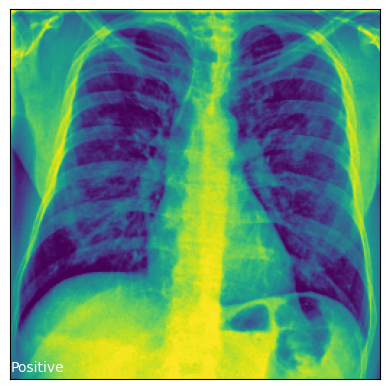

In [88]:
def draw_data(img, outcome):
    outcome = 'Positive' if outcome else 'Negative'
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(img, (256, 256)))
    plt.text(0, 250, outcome, color = 'w')

v = 134
draw_data(X_train[v], y_train[v])

## histogram check

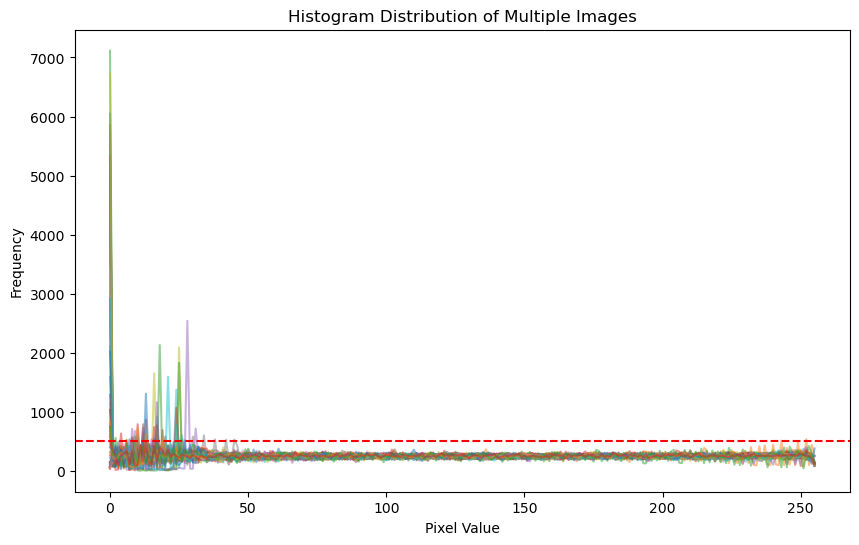

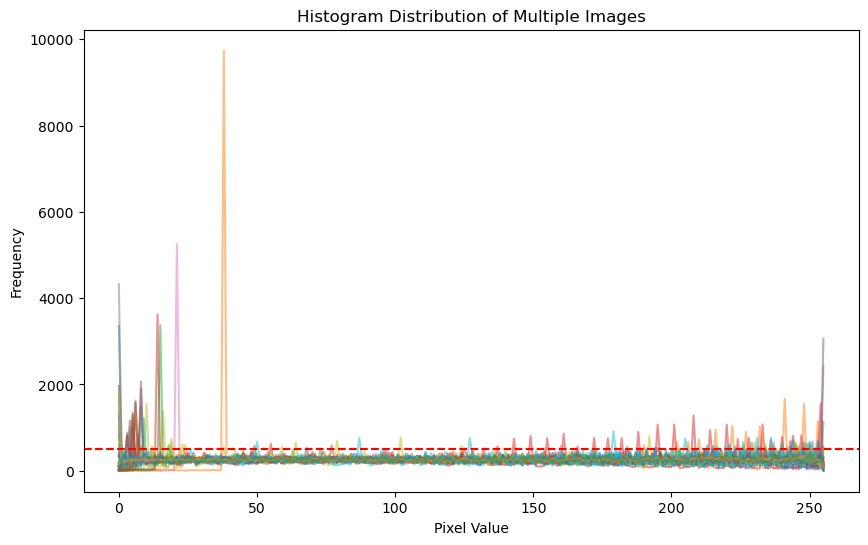

In [89]:
hist, bins = np.histogram(X_train[80], bins=256, range=(0, 256))

num_images = 74
histograms = []
for i in range(num_images):
    hist, _ = np.histogram(X_train[i], bins=256, range=(0, 256))
    histograms.append(hist)

plt.figure(figsize=(10, 6))
for i in range(num_images):
    plt.plot(histograms[i], alpha=0.5, label=f'Image {i+1}')
    
plt.axhline(y=500, color='red', linestyle='--', label='Threshold')
plt.title('Histogram Distribution of Multiple Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

hist, bins = np.histogram(X_train[80], bins=256, range=(0, 256))

num_images = 147
histograms = []
for i in range(num_images):
    hist, _ = np.histogram(X_train[i], bins=256, range=(0, 256))
    histograms.append(hist)

plt.figure(figsize=(10, 6))
for i in range(74, num_images):
    plt.plot(histograms[i], alpha=0.5, label=f'Image {i+1}')
    
plt.axhline(y=500, color='red', linestyle='--', label='Threshold')
plt.title('Histogram Distribution of Multiple Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Thresholding

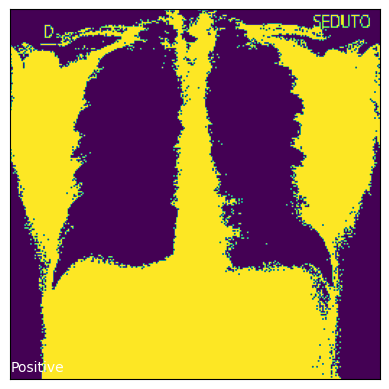

In [90]:
image = np.reshape(X_train[134], (256, 256))

# 이진화 수행
threshold = 120

for i in range(len(X_train2)):
    image = np.reshape(X_train2[i], (256, 256))
    binary_image = np.where(image <= threshold, 0, 1)
    X_train2[i] = binary_image.flatten()
for i in range(len(X_test2)):
    image = np.reshape(X_test2[i], (256, 256))
    binary_image = np.where(image <= threshold, 0, 1)
    X_test2[i] = binary_image.flatten()
    
v=120
draw_data(X_train2[v], y_train[v])

## Shuffle data (not necessary)

In [91]:
# 데이터 셔플
permutation = np.random.permutation(len(X_train))
X_train = np.array(X_train)[permutation]
X_train2 = np.array(X_train)[permutation]
y_train = np.array(y_train)[permutation]

permutation = np.random.permutation(len(X_test))
X_test = np.array(X_test)[permutation]
X_test2 = np.array(X_test)[permutation]
y_test = np.array(y_test)[permutation]

## LinearSVC and original data

0.975

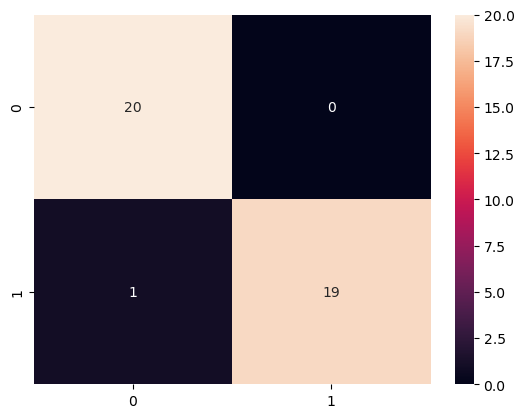

In [92]:
model = LinearSVC(C=1, loss='hinge')
model.fit(X_train, y_train)
pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, pred),annot=True)
accuracy_score(y_test, pred)

## SVC and preprocessed data

1.0

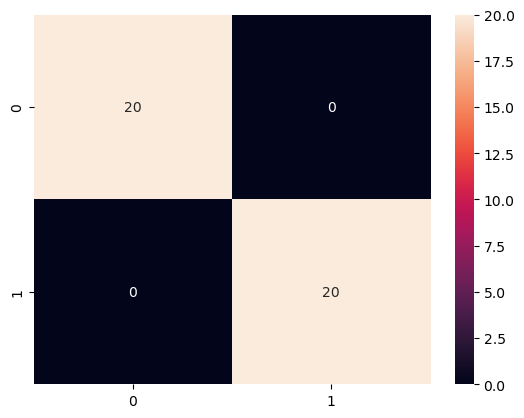

In [93]:
model = SVC(C=10, kernel='poly', degree = 5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, pred),annot=True)
accuracy_score(y_test, pred)

## LinearSVC and preprocessed data

0.45

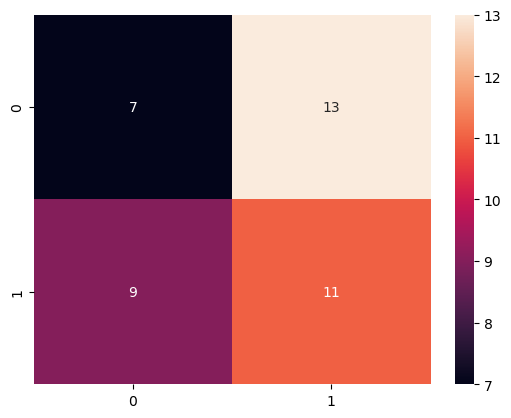

In [94]:
model = LinearSVC(C=1, loss='hinge')
model.fit(X_train2, y_train)
pred = model.predict(X_test2)

sns.heatmap(confusion_matrix(y_test, pred),annot=True)
accuracy_score(y_test, pred)

## SVC and preprocessed data

0.475

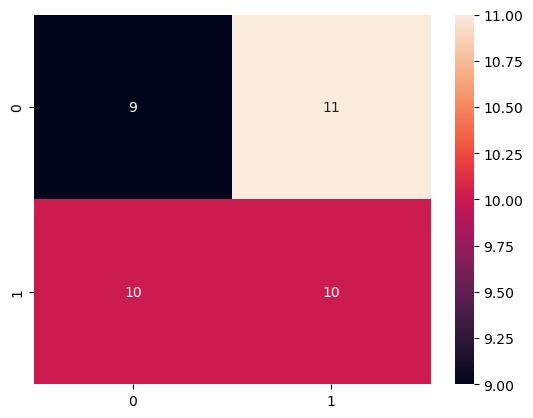

In [95]:
model = SVC(C=10, kernel='poly', degree=4)
model.fit(X_train2, y_train)
pred = model.predict(X_test2)

sns.heatmap(confusion_matrix(y_test, pred),annot=True)
accuracy_score(y_test, pred)